# About
Chapter 12: Election Predictions as Martingales

In [7]:
import numpy as np
import pandas as pd

# Figure 12.1: Price as function of Volatility

In [176]:
from scipy.special import erfc, erfinv

def binary_price_sigma(Y0, sigma, t0, T, l=0):
    """Forecast probability of winning on a binary bet.
    
    For SCFT chapter 12 election prediction
    
    SCFT Equation 12.2

    
    Parameters
    ----------
    Y0 : float
        Current level of the underlying (estimated).
        Between 0 and 1, representing 0 to 100% vote share.
    sigma : float
        Volatility of the shadow brownian motion process.
        Should be non-negative.
    t0 : float
        Current position in time. Should be positive.
    T : float
        Time at maturity. Should be positive.        
    l : float (default: 0)
        Success threshold for the X process. Between -inf and +inf.
        
    Returns
    -------
    price : float
        Binary forecast probability, which can be interpreted as a price.
    """
    
    # TOP
    top = l - erfinv(2*Y0-1) * np.exp((sigma**2)*(T-t0))

    # BOTTOM
    bottom_exponent = 2*(sigma**2)*(T-t0)

    bottom = np.sqrt(np.exp(bottom_exponent)-1)

    # Main Calculation
    price = 0.5*erfc(top/bottom)
    
    return price

In [177]:
def binary_price_s(Y0, s, t0, T, l=0.5):
    """Forecast probability of winning on a binary bet.
    
    For SCFT chapter 12 election prediction
    
    SCFT Equation 12.2

    
    Parameters
    ----------
    Y0 : float
        Current level of the underlying (estimated).
        Between 0 and 1, representing 0 to 100% vote share.
    s : float
        Volatility of the underlying Y process.
        Should be non-negative.
    t0 : float
        Current position in time. Should be positive.
    T : float
        Time at maturity. Should be positive.        
    l : float (default: 0.5)
        Success threshold. Between 0 and 1.
        
    Returns
    -------
    price : float
        Binary forecast probability, which can be interpreted as a price.
    """
    sigma = get_sigma(Y0, s, t0, T)
    
    # TOP
    top = l - erfinv(2*Y0-1) * np.exp((sigma**2)*(T-t0))

    # BOTTOM
    bottom_exponent = 2*(sigma**2)*(T-t0)

    bottom = np.sqrt(np.exp(bottom_exponent)-1)

    # Main Calculation
    price = 0.5*erfc(top/bottom)
    
    return price

In [178]:
def get_sigma(Y0, s, t0, T):
    """Calculate the volatility of the underlying brownian motion.
    
    Maps underlying volatility s to brownian motion volatility sigma.
    
    SCFT Equation 12.2
    
    Parameters
    ----------
    Y0 : float
        Current level of the underlying (estimated).
        Between 0 and 1, representing 0 to 100% vote share.
    s : float
        Volatility of the underlying Y process.
        Should be non-negative.
    t0 : float
        Current position in time. Should be positive.
    T : float
        Time at maturity. Should be positive.        

    Returns:
    sigma : float
        Volatility of the shadow brownian motion process.
    """
    
    top_exponent = 2*erfinv(2*Y0-1)**2
    top_log_input = 2*np.pi*(s**2)*np.exp(top_exponent)+1
    top = np.sqrt(np.log(top_log_input))
    
    bottom = np.sqrt(2*(T-t0))
    
    sigma = top/bottom
    
    return sigma

### Simple Example

In [219]:
Y0 = 0.49
s = 0.10
t0 = 0
T = 100

In [220]:
sigma = 0.10

In [221]:
#binary_price_s(Y0, s, t0, T)
#binary_price_sigma(Y0, get_sigma(Y0, s, t0, T), t0, T)

In [222]:
binary_price_sigma(Y0, sigma, t0, T)

0.37953310001914764

Comment:
* Temporarily use the sigma formula because the s version seems insensitive to time to maturity
* To be debugged

### Tabular Example

In [223]:
s_values = np.arange(0, 0.13, step=0.01)
s_values = pd.Series(s_values, name='volatility')

Y0_values = [0.42, 0.44, 0.46, 0.48, 0.5]

,0.42,0.44,0.46,0.48,0.50
volatility,,,,,
0.00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
0.01,7.287093e-11,7.338370e-10,6.398693e-09,4.871985e-08,3.262029e-07
0.02,7.407225e-04,1.373859e-03,2.458805e-03,4.256105e-03,7.139439e-03
0.03,1.832287e-02,2.475232e-02,3.290558e-02,4.309703e-02,5.566379e-02
0.04,6.211714e-02,7.494377e-02,8.957780e-02,1.061478e-01,1.247759e-01
0.05,1.151120e-01,1.316558e-01,1.496271e-01,1.690624e-01,1.899930e-01
0.06,1.659174e-01,1.842351e-01,2.036079e-01,2.240400e-01,2.455333e-01
0.07,2.108351e-01,2.299243e-01,2.497879e-01,2.704205e-01,2.918164e-01
0.08,2.493861e-01,2.687857e-01,2.887590e-01,3.092988e-01,3.303986e-01


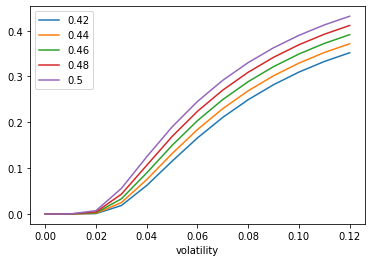

In [224]:
# Generate DataFrame
# * columns = Y0_values
# * rows = s_values

data = {}

for Y0_value in Y0_values:
    
    data[Y0_value] = s_values.apply(lambda s_value: binary_price_sigma(Y0_value, s_value, t0, T))
    
df = pd.DataFrame(data)
df.index = s_values

display(df)
df.plot();

Comment:
* There's something wrong here
* Under zero volatility the initial Y0 should equal the probability
* To Do:
    * Check the coding of the formulas